## Case Study 1: Ensemble Learning (Spam Classifier)

**Overview**

In the case study, I hope to build an ensemble classifer that can determine which emails are spam or ham i.e. not spam. I originally wanted to create a classfier for fake news. However, the phenomenon of fake news is a rather new trend and therefore is not completely understood or defined. Additionally, datasets are scarce. For that reason, I decide to take a similar approach by building a classifer that could determine if a email was spam or not. I technicques used in this task could be applied to a news dataset at a latter date.

I obtained the Enron spam dataset: http://www.aueb.gr/users/ion/data/enron-spam/


Example Document for Each Section of the Brown Corpus

ID	File	Genre	Description
A16	ca16	news	Chicago Tribune: Society Reportage
B02	cb02	editorial	Christian Science Monitor: Editorials
C17	cc17	reviews	Time Magazine: Reviews
D12	cd12	religion	Underwood: Probing the Ethics of Realtors
E36	ce36	hobbies	Norling: Renting a Car in Europe
F25	cf25	lore	Boroff: Jewish Teenage Culture
G22	cg22	belles_lettres	Reiner: Coping with Runaway Technology
H15	ch15	government	US Office of Civil and Defence Mobilization: The Family Fallout Shelter
J17	cj19	learned	Mosteller: Probability with Statistical Applications
K04	ck04	fiction	W.E.B. Du Bois: Worlds of Color
L13	cl13	mystery	Hitchens: Footsteps in the Night
M01	cm01	science_fiction	Heinlein: Stranger in a Strange Land
N14	cn15	adventure	Field: Rattlesnake Ridge
P12	cp12	romance	Callaghan: A Passion in Rome
R06	cr06	humor	Thurber: The Future, If Any, of Comedy

## Data Preparation and Exploratory Data Analysis

In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import brown

In [27]:
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

/Users/chrisbarton/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


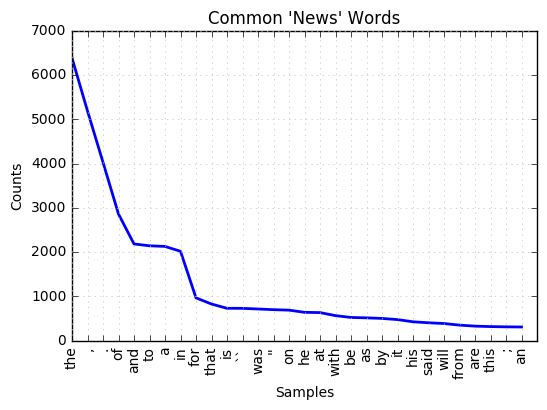

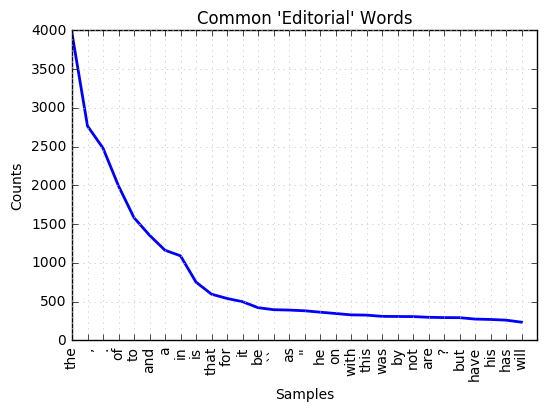

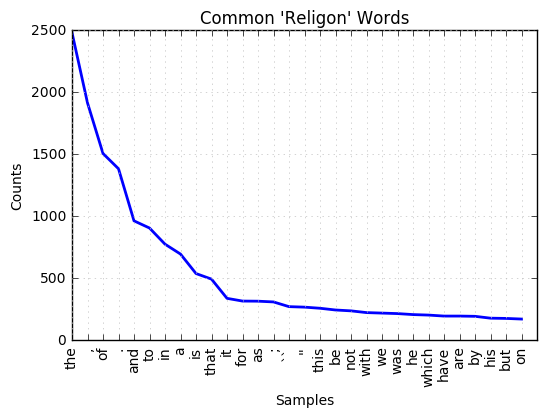

In [32]:
# let's look at most common words for news, editorial and religon
news_fdist = nltk.FreqDist(w.lower() for w in brown.words(categories='news'))
editorial_fdist = nltk.FreqDist(w.lower() for w in brown.words(categories='editorial'))
religon_fdist = nltk.FreqDist(w.lower() for w in brown.words(categories='religion'))

# plotting 
news_fdist.plot(30, cumulative=False, title="Common 'News' Words")
editorial_fdist.plot(30, cumulative=False, title="Common 'Editorial' Words")
religon_fdist.plot(30, cumulative=False, title="Common 'Religon' Words")

At first glance, it does appear the most common words are stop words.  Let's remove stop words as part of the preprocessing.

In [2]:
from nltk.corpus import stopwords
import string


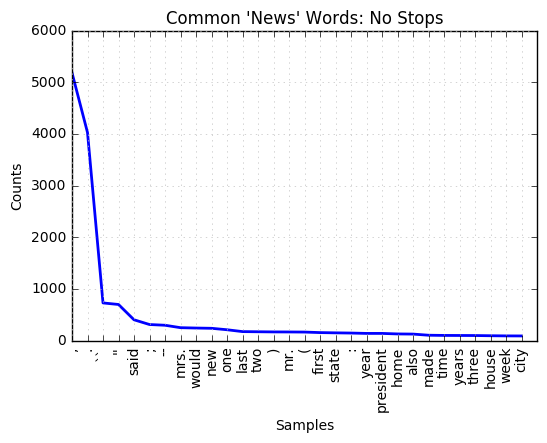

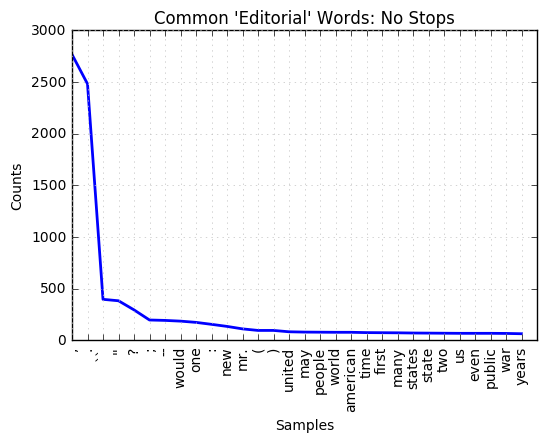

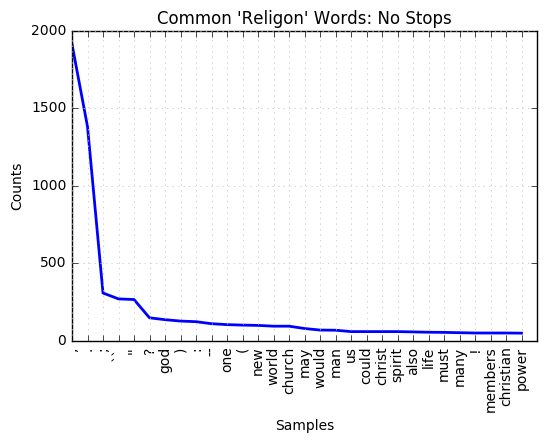

In [50]:
# edit list comprehension to exclude stop words stopwords.words('english')
news_fdist_no_stops = nltk.FreqDist(w.lower() for w in brown.words(categories='news') 
                                    if w.lower() not in stopwords.words('english'))

editorial_fdist_no_stops = nltk.FreqDist(w.lower() for w in brown.words(categories='editorial') 
                                         if w.lower() not in stopwords.words('english'))

religon_fdist_no_stops = nltk.FreqDist(w.lower() for w in brown.words(categories='religion') 
                                       if w.lower() not in stopwords.words('english'))

# cnn_fdist.plot(30,cumulative=False, title="CNN Most Common Words")
news_fdist_no_stops.plot(30, cumulative=False, title="Common 'News' Words: No Stops")
editorial_fdist_no_stops.plot(30, cumulative=False, title="Common 'Editorial' Words: No Stops")
religon_fdist_no_stops.plot(30, cumulative=False, title="Common 'Religon' Words: No Stops")


This distributions look slightly different, however we now see more punctuation.  Next, I'll tokenize words.

In [3]:
from nltk.tokenize import RegexpTokenizer
toker = RegexpTokenizer(r'[^0-9a-zA-Z]+', gaps=True)


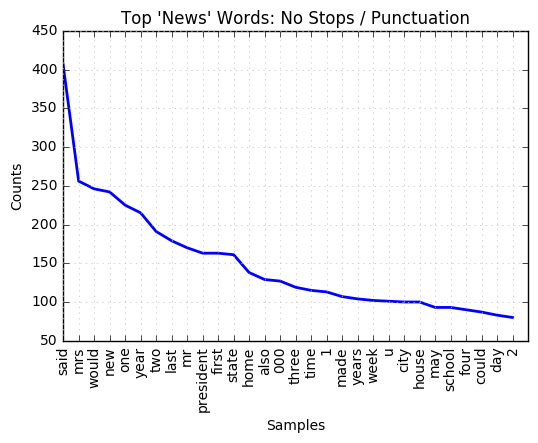

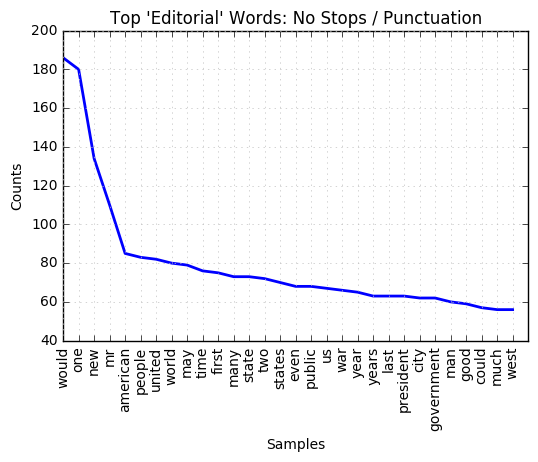

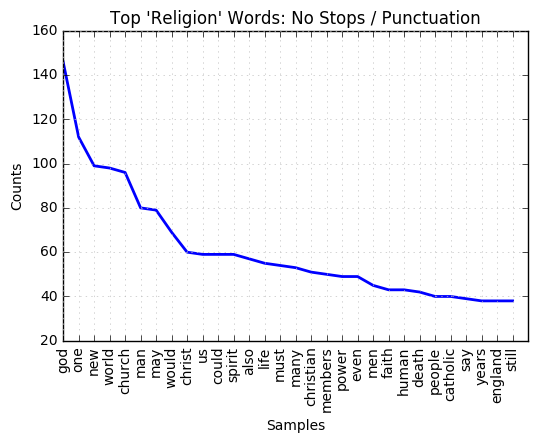

In [54]:
# I'll remove tokenize words
#'[^0-9a-zA-Z]+'

news_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='news')))
                                                       if w.lower() not in stopwords.words('english'))

editorial_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='editorial')))
                                                       if w.lower() not in stopwords.words('english'))

religion_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='religion')))
                                                       if w.lower() not in stopwords.words('english'))


news_fdist_no_stops_punct.plot(30, cumulative=False, title="Top 'News' Words: No Stops / Punctuation")
editorial_fdist_no_stops_punct.plot(30, cumulative=False, title="Top 'Editorial' Words: No Stops / Punctuation")
religion_fdist_no_stops_punct.plot(30, cumulative=False, title="Top 'Religion' Words: No Stops / Punctuation")

Now we can start seeing words related to each topic pop out.  For example, we can see god and church in religion.  Although, news and editorial do still look like the same words are used. Next, I'll tabluate the results. 

In [55]:
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [56]:
# i'll include all categories that I plan to use in classification algorithm
news_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='news')))
                                                       if w.lower() not in stopwords.words('english'))

editorial_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='editorial')))
                                                       if w.lower() not in stopwords.words('english'))

religion_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='religion')))
                                                       if w.lower() not in stopwords.words('english'))

science_fiction_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='science_fiction')))
                                                       if w.lower() not in stopwords.words('english'))

government_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='government')))
                                                       if w.lower() not in stopwords.words('english'))

fiction_fdist_no_stops_punct = nltk.FreqDist(w.lower() for w in toker.tokenize(' '.join(brown.words(categories='fiction')))
                                                       if w.lower() not in stopwords.words('english'))

In [60]:
cfd = nltk.ConditionalFreqDist((genre, word) for genre in brown.categories()
                                                   for word in brown.words(categories=genre))

genres = ['news', 'editorial', 'government', 'religion', 'fiction', 'science_fiction']

In [68]:
cfd.tabulate(conditions=genres,samples=[w[0] for w in news_fdist_no_stops_punct.most_common(10)],  cumulative=True)

                     said       mrs     would       new       one      year       two      last        mr president 
           news       402       402       646       794       978      1116      1273      1434      1434      1487 
      editorial        52        52       232       312       462       514       573       632       632       639 
     government        18        18       138       238       349       532       594       614       614       641 
       religion        27        27        95       172       259       267       294       308       308       309 
        fiction       192       192       479       512       680       689       757       788       788       789 
science_fiction        41        41       120       129       165       167       177       186       186       186 


In [77]:
cfd.tabulate(conditions=genres,samples=[w[0] for w in religion_fdist_no_stops_punct.most_common(10)],  cumulative=True)

                   god    one    new  world church    man    may  would christ     us 
           news      0    184    332    369    385    457    523    767    767    779 
      editorial      0    150    230    296    306    362    436    616    616    680 
     government      0    111    211    255    258    270    423    543    543    567 
       religion      5     92    169    259    310    374    452    520    520    579 
        fiction      0    168    201    225    264    375    383    670    670    707 
science_fiction      0     36     45     50     53     70     74    153    153    159 


In two graphs above, we can see the conditional counts of various words within each category.  From the bottom chart, we can see the word 'god' only appears in religous text.  I was suprised to see the word 'president' in all categories of text.  I thought that would be a dead giveaway for science fiction or fiction.

## Modeling

In [8]:
## idf and tf-idf indices 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB

I actually have a little more preprocessing to do before modeling. I need to put data into dataframe, split into test and evalution and use TF-IDF feature engineering. 

In [1]:
from nltk.tokenize import RegexpTokenizer
toker = RegexpTokenizer(r'[^0-9a-zA-Z]+', gaps=True)
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
from nltk.corpus import brown


documents = [(list(brown.words(fileid)), category) 
                   for category in brown.categories() 
                   for fileid in brown.fileids(category)] 

#for category in brown.categories():
#    for fileid in brown.fileids(category):
#       dataset.append((brown.words(fileids = fileid),category))

In [3]:
print(len(documents))


500


In [4]:
#toker.tokenize(' '.join(dataset[0][0]))
data = pd.DataFrame(documents)
data.columns = ['text', 'category']
data.head()

,text,category
0,"[Dan, Morgan, told, himself, he, would, forget...",adventure
1,"[Gavin, paused, wearily, ., ``, You, can't, st...",adventure
2,"[The, sentry, was, not, dead, ., He, was, ,, i...",adventure
3,"[``, So, it, wasn't, the, earthquake, that, ma...",adventure
4,"[She, was, carrying, a, quirt, ,, and, she, st...",adventure


In [5]:
data['text'] = data['text'].apply(lambda x: ' '.join([w.lower() for w in ' '.join(toker.tokenize(' '.join(x))).split(' ')
                                                                if w.lower() 
                                                                     not in stopwords.words('english')]))

In [6]:
data.head()

,text,category
0,dan morgan told would forget ann turner well r...,adventure
1,gavin paused wearily stay late said dawn make ...,adventure
2,sentry dead fact showing signs reviving carryi...,adventure
3,earthquake made return village dammit want go ...,adventure
4,carrying quirt started raise let fall dangle w...,adventure


In [9]:
# last step of data prep. need to perform feature engineering and split data in train, val, and test sets
from sklearn.cross_validation import train_test_split
train, test, target_train, target_test = train_test_split(data['text'], data['category'], test_size=0.2, random_state=33)


tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(train)

Now on to modeling!

In [10]:
# first, I'll try to get a baseline for which base learners work the best. 
clf = MultinomialNB().fit(tfs, target_train)

In [11]:
# get predictions 
train_predicts = clf.predict(tfs)

In [12]:
target_train.unique()

array([u'government', u'learned', u'news', u'mystery', u'belles_lettres',
       u'adventure', u'fiction', u'hobbies', u'lore', u'humor',
       u'religion', u'reviews', u'romance', u'editorial',
       u'science_fiction'], dtype=object)

In [13]:
# graphing function
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

/Users/chrisbarton/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Confusion matrix, without normalization
[[ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  2  0  0 16  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  1  0 13  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  6  2  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  1  0  0 34  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]]


/Users/chrisbarton/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

  adventure       0.00      0.00      0.00        22
belles_lettres       0.25      1.00      0.41        66
  editorial       0.00      0.00      0.00        21
    fiction       0.00      0.00      0.00        23
 government       1.00      0.08      0.15        25
    hobbies       1.00      0.04      0.07        28
      humor       0.00      0.00      0.00         8
    learned       0.63      0.96      0.76        67
       lore       1.00      0.05      0.10        38
    mystery       0.00      0.00      0.00        18
       news       1.00      0.92      0.96        37
   religion       0.00      0.00      0.00        12
    reviews       0.00      0.00      0.00        11
    romance       0.00      0.00      0.00        20
science_fiction       0.00      0.00      0.00         4

avg / total       0.47      0.42      0.31       400


0.4225


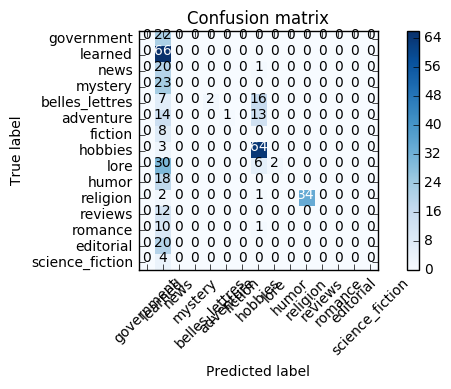

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools


plot_confusion_matrix(confusion_matrix(target_train, train_predicts)
                      , ['government', u'learned', u'news', u'mystery', u'belles_lettres',
                        u'adventure', u'fiction', u'hobbies', u'lore', u'humor',
                        u'religion', u'reviews', u'romance', u'editorial',
                        u'science_fiction']
                      , normalize=False, title='Confusion matrix'
                      , cmap=plt.cm.Blues)


print(classification_report(target_train, train_predicts))
print
print(accuracy_score(target_train, train_predicts))

42% accuracy on the training data. Plenty of room to improve the model. 

I'd like to test a 

In [20]:
tfs

<400x38090 sparse matrix of type '<type 'numpy.float64'>'
	with 261249 stored elements in Compressed Sparse Row format>

In [22]:
from nltk.classify import SklearnClassifier
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(tfs, target_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 67  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]]
             precision    recall  f1-score   support

  adventure       0.00      0.00      0.00        22
belles_lettres       0.00      0.00      0.00        66
  editorial       0.00      0.00      0.00        21
    fiction       0.00 

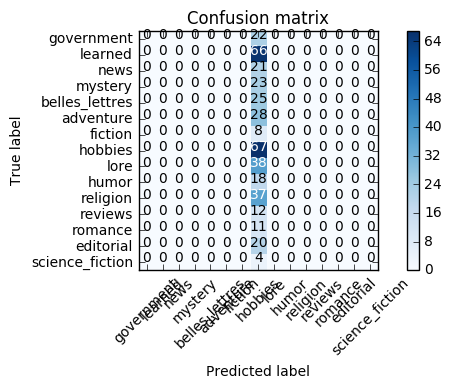

In [23]:
train_predicts = clf.predict(tfs)

plot_confusion_matrix(confusion_matrix(target_train, train_predicts)
                      , ['government', u'learned', u'news', u'mystery', u'belles_lettres',
                        u'adventure', u'fiction', u'hobbies', u'lore', u'humor',
                        u'religion', u'reviews', u'romance', u'editorial',
                        u'science_fiction']
                      , normalize=False, title='Confusion matrix'
                      , cmap=plt.cm.Blues)


print(classification_report(target_train, train_predicts))
print
print(accuracy_score(target_train, train_predicts))

Looks line MNB is performs much better on training dataset, however, I haven't attempted to do any paramter tuning.

In [25]:
# dtc = nltk.classify.DecisionTreeClassifier.train(tfs, entropy_cutoff=0, support_cutoff=0)  


In [ ]:
# http://scikit-learn.org/stable/supervised_learning.html

In [ ]:
import numpy
import scipy

from nltk.classify import maxent
nltk.classify.MaxentClassifier.ALGORITHMS
# ['GIS','IIS','CG','BFGS','Powell','LBFGSB','Nelder-Mead','MEGAM','TADM']

# MEGAM or TADM are not rec'd for text classification
mec = nltk.classify.MaxentClassifier.train(train_features, 'GIS', trace=0, max_iter=1000)